In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [ ]:
data_base_dir = Path('/Users/janneke/Documents/Documents – Janneke’s MacBook/data/')
data_base_dir.mkdir(exist_ok=True, parents=True)

In [ ]:
from ocrpostcorrection.icdar_data import generate_data

In [ ]:
%%time
# Train and val data
in_dir = data_base_dir/'ICDAR2019_POCR_competition_dataset'/'ICDAR2019_POCR_competition_training_18M_without_Finnish'
data, md = generate_data(in_dir)

11it [00:24,  2.26s/it]

CPU times: user 22.2 s, sys: 1.25 s, total: 23.4 s
Wall time: 24.9 s


In [ ]:
# test data
in_dir = data_base_dir/'ICDAR2019_POCR_competition_dataset'/'ICDAR2019_POCR_competition_evaluation_4M_without_Finnish'
data_test, md_test = generate_data(in_dir)

11it [00:06,  1.78it/s]


In [ ]:
out_dir = data_base_dir/'ocrpostcorrection'/'icdar-dataset-20220207'

In [ ]:
X_train = pd.read_csv(out_dir/'train.csv', index_col=0)
X_val = pd.read_csv(out_dir/'val.csv', index_col=0)
X_test = pd.read_csv(out_dir/'test.csv', index_col=0)

In [ ]:
from ocrpostcorrection.error_correction import get_tokens_with_OCR_mistakes

tdata = get_tokens_with_OCR_mistakes(data, data_test, list(X_val.file_name))
tdata.head()

,ocr,gs,ocr_aligned,gs_aligned,start,len_ocr,language,subset,dataset,len_gs,diff
0,ie,je,ie,je,10,2,SL,SL1,train,2,0
1,Raž!:,Bog,Raž!:,@@Bog,13,5,SL,SL1,train,3,2
2,stvaeil,stvaril,stvaeil,stvaril,19,7,SL,SL1,train,7,0
3,n^hn,nebö,n^hn,nebö,27,4,SL,SL1,train,4,0
4,in,in zemljo.,in@@@@@@@@,in zemljo.,32,2,SL,SL1,train,10,-8


In [ ]:
print('token data:', tdata.shape[0], 'samples')

token data: 1853825 samples


In [ ]:
tdata.dataset.value_counts()

train    1323937
test      384463
val       145425
Name: dataset, dtype: int64

In [ ]:
tdata = tdata.drop_duplicates(subset=['ocr', 'gs', 'dataset'])

In [ ]:
# Save to file
out_dir = data_base_dir/'ocrpostcorrection'/'icdar-task2-dataset-20221031'
out_dir.mkdir(exist_ok=True, parents=True)

out_file = out_dir/'task2dataset-no-duplicates.csv'
tdata.to_csv(out_file)

In [ ]:
print('token data:', tdata.shape[0], 'samples')
tdata.dataset.value_counts()

token data: 1130067 samples


train    760429
test     264435
val      105203
Name: dataset, dtype: int64

In [ ]:
tdata.len_ocr.describe()

count    1.130067e+06
mean     9.114542e+00
std      1.036306e+01
min      1.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      1.100000e+01
max      3.255000e+03
Name: len_ocr, dtype: float64

In [ ]:
tdata.len_gs.describe()

count    1.130067e+06
mean     8.718004e+00
std      7.753768e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      1.100000e+01
max      2.986000e+03
Name: len_gs, dtype: float64

In [ ]:
tdata['diff'].describe()

count    1.130067e+06
mean     3.965376e-01
std      1.145284e+01
min     -2.963000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.255000e+03
Name: diff, dtype: float64

<AxesSubplot: >

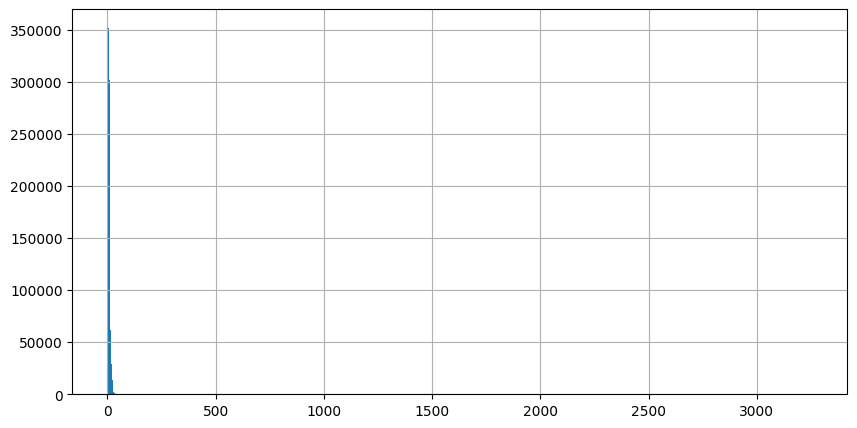

In [ ]:
tdata.len_ocr.hist(bins=1000, figsize=(10,5))

(0.0, 30.0)

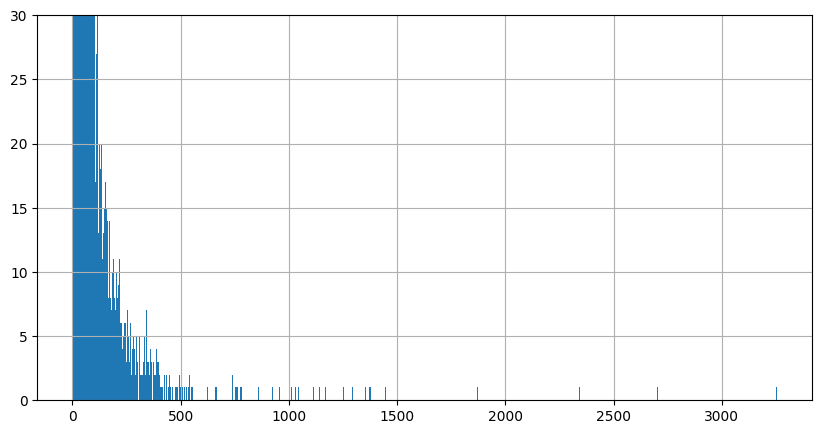

In [ ]:
tdata.len_ocr.hist(bins=1000, figsize=(10,5))
plt.ylim(0, 30)

(0.0, 30.0)

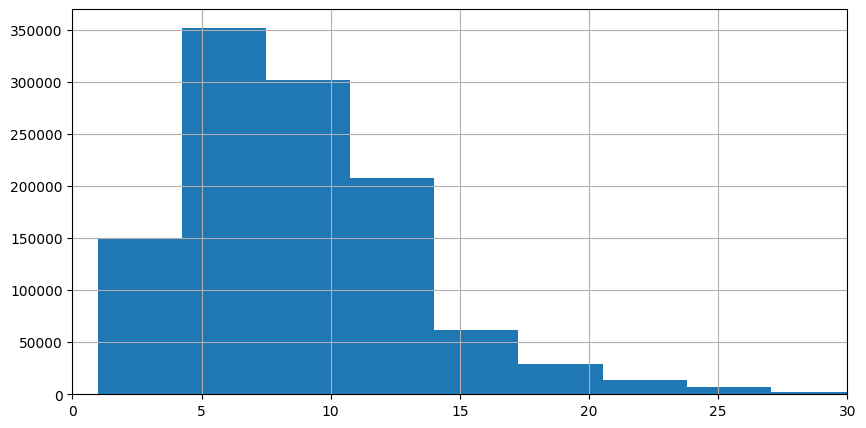

In [ ]:
tdata.len_ocr.hist(bins=1000, figsize=(10,5))
plt.xlim(0, 30)